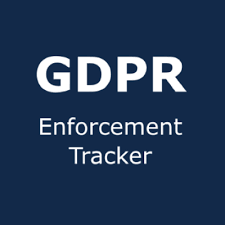

# AI challenge

Author: Ivett Elena Fuentes Herrera

# Description
Sensitive data has great value, which is why many governments have established regulations that address both data protection and data privacy. The General Data Protection Regulation (GDPR) of the European Union (EU) is one of the most influential laws in recent years. Any company that does business in the EU or the European Economic Area (EEA), or that markets products or services for people in the EU or EEA must comply with GDPR standards or face severe financial repercussions in the form of fines and injunctions.
The CMS.Law GDPR Enforcement Tracker is an overview of fines and penalties that data protection authorities within the EU have imposed under the EU GDPR.

In [1]:
from utils import *

Several functions are set up in [utils.py](utils.py) 

# Data loading
Load and summarize the CMS.Law GDPR Enforcement Tracker data, which is an overview of fines and penalties that data protection authorities within the EU have imposed under the EU GDPR

**Source**: https://www.enforcementtracker.com/

In [2]:
# load the CMS.Law GDPR data
df = load_data()
# summarize the shape of the dataset
print('The shape is', df.shape)

The shape is (1147, 11)


# Data representation and pre-processing
Clean and transform raw data into a more understandable, useful, and efficient format

In [3]:
# search for missing values
df = df[df['Fine'].notna()]
print('The shape is', df.shape)
df = df.reset_index(drop = True)
# search for Unknown values
unknown_idx = []
for row in range(len(df)):
    art = df.iloc[row,5][0]
    if art == 'Unknown':
        unknown_idx.append(row)              

The shape is (1118, 11)


In [4]:
df.drop(df.iloc[unknown_idx,:].index, axis=0, inplace=True)
df = df.reset_index(drop=True)
print('The shape is', df.shape)

# search for Fine == 0

del_Fine_idx = df[df.Fine == 0].index
df.drop(del_Fine_idx, axis=0, inplace=True)
print('The shape is', df.shape)

save_dataset(df, "GDPR")
# tail of the dataset
df.tail(5)

The shape is (1109, 11)
The shape is (1105, 11)


,Id,Country,Date_of_decision,Fine,Controller_Processor,Quoted_Article,Type,Source,Authority,Sector,Summary
1104,ETid-1143,SPAIN,2022-04-29,4200.0,"CLÍNICA DENTAL SAN FRANCISCO, S.L.","[Art. 17 GDPR, Art. 21 LSSI]",Insufficient fulfilment of data subjects rights,<a class='blau' href='https://www.aepd.es/es/d...,Spanish Data Protection Authority (aepd),Health Care,The Spanish DPA (AEPD) has imposed a fine on C...
1105,ETid-1144,SPAIN,2022-04-29,16000.0,"LABORATORIOS GONZÁLEZ, S.L.",[Art. 5 (1) f) GDPR],Non-compliance with general data processing pr...,<a class='blau' href='https://www.aepd.es/es/d...,Spanish Data Protection Authority (aepd),Health Care,The Spanish DPA (AEPD) has fined LABORATORIOS ...
1106,ETid-1145,ROMANIA,2022-05-03,4000.0,Megareduceri TV S.R.L.,[Art. 58 (1) GDPR],Insufficient cooperation with supervisory auth...,<a class='blau' href='https://www.dataprotecti...,Romanian National Supervisory Authority for Pe...,Industry and Commerce,Failure to provide requested information to th...
1107,ETid-1146,CYPRUS,2021-09-17,10000.0,Mediterranean Hospital of Cyprus,"[Art. 31 GDPR, Art. 58 (1) a) GDPR]",Insufficient cooperation with supervisory auth...,<a class='blau' href='https://www.dataprotecti...,Cypriot Data Protection Commissioner,Health Care,The Cypriot DPA (ANSPDCP) has fined Mediterran...
1108,ETid-1147,SPAIN,2022-04-28,1500.0,"CAFFE VECCHIO, S.L.","[Art. 5 (1) f) GDPR, Art. 6 (1) a) GDPR]",Insufficient legal basis for data processing,<a class='blau' href='https://www.aepd.es/es/d...,Spanish Data Protection Authority (aepd),Employment,"The Spanish DPA has fined CAFFE VECCHIO, S.L. ..."


# Feature extraction from structured and unstructured data
Extract useful, structured information from the unstructured data (i.e., *Summary*, *Quoted articles*)

The *Summary* feature provides a free text description of the violation. We transform this feature into numerical features usable for machine learning models by computing TF-IDF, which stands for Term Frequency-Inverse Document Frequency

In [5]:
#  tf_idf representation
df = pd.read_csv('Data/GDPR.csv')
df.Summary.replace(regex=r'[^a-zA-Z]', value=' ', inplace=True)
tf_idf = tf_idf_representation_df(df)
print('The shape is', tf_idf.shape)
save_dataset(tf_idf, "GDPR_Summary_Tf_Idf")
# tail of the dataset
tf_idf.tail(5) 

The shape is (1105, 31)


,access,addit,aepd,art,author,breach,compani,consent,contract,control,...,purpos,receiv,request,secur,spanish,surveil,system,violat,Fine,Id
1100,0.0,0.000000,0.467931,0.000000,0.0,0.0,0.0,0.000000,0.0,0.535264,...,0.0,0.0,0.252572,0.0,0.233186,0.0,0.0,0.000000,4200,ETid-1143
1101,0.0,0.000000,0.298954,0.000000,0.0,0.0,0.0,0.338452,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.297958,0.0,0.0,0.000000,16000,ETid-1144
1102,0.0,0.000000,0.000000,0.458355,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.476385,0.0,0.000000,0.0,0.0,0.424414,4000,ETid-1145
1103,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.433148,0.0,0.000000,0.0,0.0,0.000000,10000,ETid-1146
1104,0.0,0.380588,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.339194,0.0,0.0,0.000000,1500,ETid-1147


Quoted articles, sub-articles, and subsections follow a hierarchical structure that should not be ignored. We should be able to retain article information present in each row. We transform this feature into categorical features usable for machine learning models by computing embeddings.
We employ the following approaches:
 - *Categorical Article representation*, including all descriptions in the *Quoted_article* feature
 - *Categorical Article representation*, including other articles and only the general category of GDPR quoted article description in the *Quoted_article* feature

In [6]:
# pre-process the Articles dataframe
article_representation_df = create_article_features_df(df)
# article_representation_df: Dataframe(Id, Article)
article_representation_df.Article.replace(regex='\r\n', value='', inplace=True)
article_representation_df.Article.replace(regex=b'\xa0', value='', inplace=True)
article_representation_df.Article.replace(regex=b'\xa0', value='', inplace=True)
article_representation_df.Article.replace(regex='\n', value='', inplace=True)
article_representation_df.Article.replace(regex=',', value='', inplace=True)
article_representation_df.Article.replace(regex='  ', value=' ', inplace=True)
article_representation_df.Article.replace(regex='GDPR ', value='GDPR', inplace=True)
article_representation_df.Article.replace(regex='^\s* ', value='', inplace=True)
article_representation_df.Article.replace(regex='$|\s ', value='', inplace=True)

empty_idx = article_representation_df[article_representation_df.Article == ''].index
article_representation_df.drop(empty_idx, axis=0, inplace=True)
article_representation_df = article_representation_df.reset_index(drop=True)
print('The shape is', article_representation_df.shape)

The shape is (2294, 2)


In [7]:
# Categorical Article representation, including all descriptions in the quoted article feature
article_representation_matrix = categorical_representation_df(article_representation_df,1)
ids_names = pd.DataFrame(list(article_representation_matrix.index.values))
categorical_article_df = merge_dataset(ids_names, 'Data/GDPR_Article_Matrix.csv')
save_dataset(categorical_article_df, "Categorical_GDPR_Article_Df")
print('The shape is', categorical_article_df.shape)
# tail of the dataset
categorical_article_df.tail(5) 

The shape is (1105, 245)


,13 GDPR,5 GDPR,14 GDPR,5 (1) a) GDPR,6 GDPR,5 (1) c) GDPR,6 (1) GDPR,5 (1) b) GDPR,15 GDPR,32 GDPR,...,9 (2) i) GDPR,35 (1) (7) GDPR,13 (1) e) GDPR,5 (1) a) b) d) e) GDPR,35 (2) GDPR,22 (2) LSSI,2-ter Codice della privacy,2-octies Codice della privacy,17 (1) b) GDPR,Id
1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1143
1101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1144
1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1145
1103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1146
1104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1147


In [8]:
# Categorical Article representation, including other articles and only the general category of GDPR quoted article
only_article_rep_df = create_art_type_features_df(article_representation_df)
only_article_rep_matrix = categorical_representation_df(only_article_rep_df,2)
ids_names = pd.DataFrame(list(only_article_rep_matrix.index.values))
categorical_gen_article_df = merge_dataset(ids_names, 'Data/GDPR_Gen_Article_Matrix.csv')
save_dataset(categorical_gen_article_df, "Categorical_Gen_GDPR_Article_Df")
print('The shape is', categorical_gen_article_df.shape)
# tail of the dataset
categorical_gen_article_df.tail(5) 

The shape is (1105, 63)


,GDPR13,GDPR5,GDPR14,GDPR6,GDPR15,GDPR32,GDPR28,GDPR33,GDPR34,GDPR12,...,157 Codice della privacy,GDPR26,GDPR10,2-ter Codice della privacy,157 Codice della privacy,166 (2) Codice della privacy,22 (2) LSSI,2-ter Codice della privacy,2-octies Codice della privacy,Id
1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1143
1101,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1144
1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1145
1103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1146
1104,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ETid-1147


Target feature: Risk of getting fined (based on the estimated fine to be paid: *Fine* feature)

Text(0, 0.5, 'Fine')

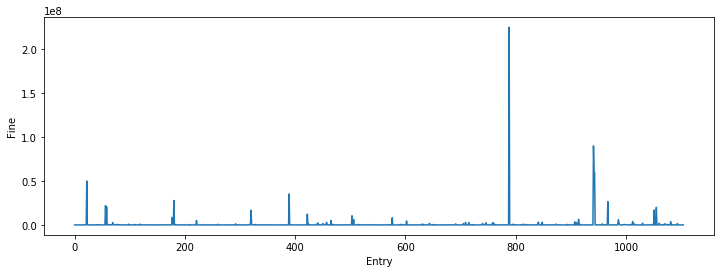

In [9]:
df_Tf_Idf = pd.read_csv('Data/GDPR_Summary_Tf_Idf.csv')
ax = df_Tf_Idf['Fine'].plot(figsize=(12, 4))
ax.set_xlabel("Entry")
ax.set_ylabel("Fine")

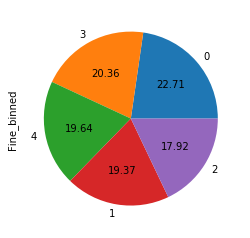

In [10]:
import seaborn as sns
df_Tf_Idf_new = df_Tf_Idf.iloc[:,:-1]
df_Tf_Idf_new['Fine_binned'] = pd.qcut(df_Tf_Idf_new['Fine'], 5, labels=False)
df_Tf_Idf_new['Fine_binned'].value_counts().plot(kind="pie", autopct="%0.2f") 

Binning or discretization is used for the transformation of the *Fine* numerical variable into a categorical feature

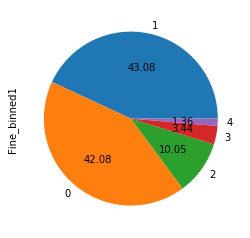

In [11]:
cut_bins = [0, 5000, 100000, 1000000, 10000000, 500000000]
df_Tf_Idf_new['Fine_binned1'] = pd.cut(df_Tf_Idf_new['Fine'], bins=cut_bins, labels=False)
df_Tf_Idf_new['Fine_binned1'] = df_Tf_Idf_new['Fine_binned1'].astype(np.int64)
df_Tf_Idf_new['Fine_binned1'].value_counts().plot(kind="pie", autopct="%0.2f")

Text(0.5, 1.0, 'Critical Risk')

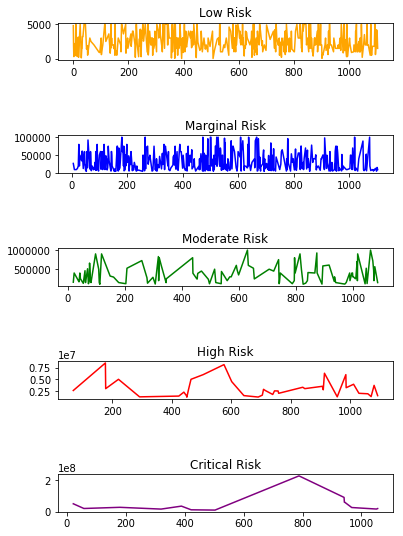

In [12]:
fig, axes = pyplot.subplots(nrows=5, ncols=1,figsize=(6, 9))
pyplot.subplots_adjust(wspace=2, hspace=2)
df_Tf_Idf_new[df_Tf_Idf_new.Fine_binned1 == 0].Fine.plot(ax=axes[0],color="orange")
axes[0].set_title("Low Risk")
df_Tf_Idf_new[df_Tf_Idf_new.Fine_binned1 == 1].Fine.plot(ax=axes[1],color="blue")
axes[1].set_title("Marginal Risk")
df_Tf_Idf_new[df_Tf_Idf_new.Fine_binned1 == 2].Fine.plot(ax=axes[2],color="green")
axes[2].set_title("Moderate Risk")
df_Tf_Idf_new[df_Tf_Idf_new.Fine_binned1 == 3].Fine.plot(ax=axes[3],color="red")
axes[3].set_title("High Risk")
df_Tf_Idf_new[df_Tf_Idf_new.Fine_binned1 == 4].Fine.plot(ax=axes[4],color="purple")
axes[4].set_title("Critical Risk")

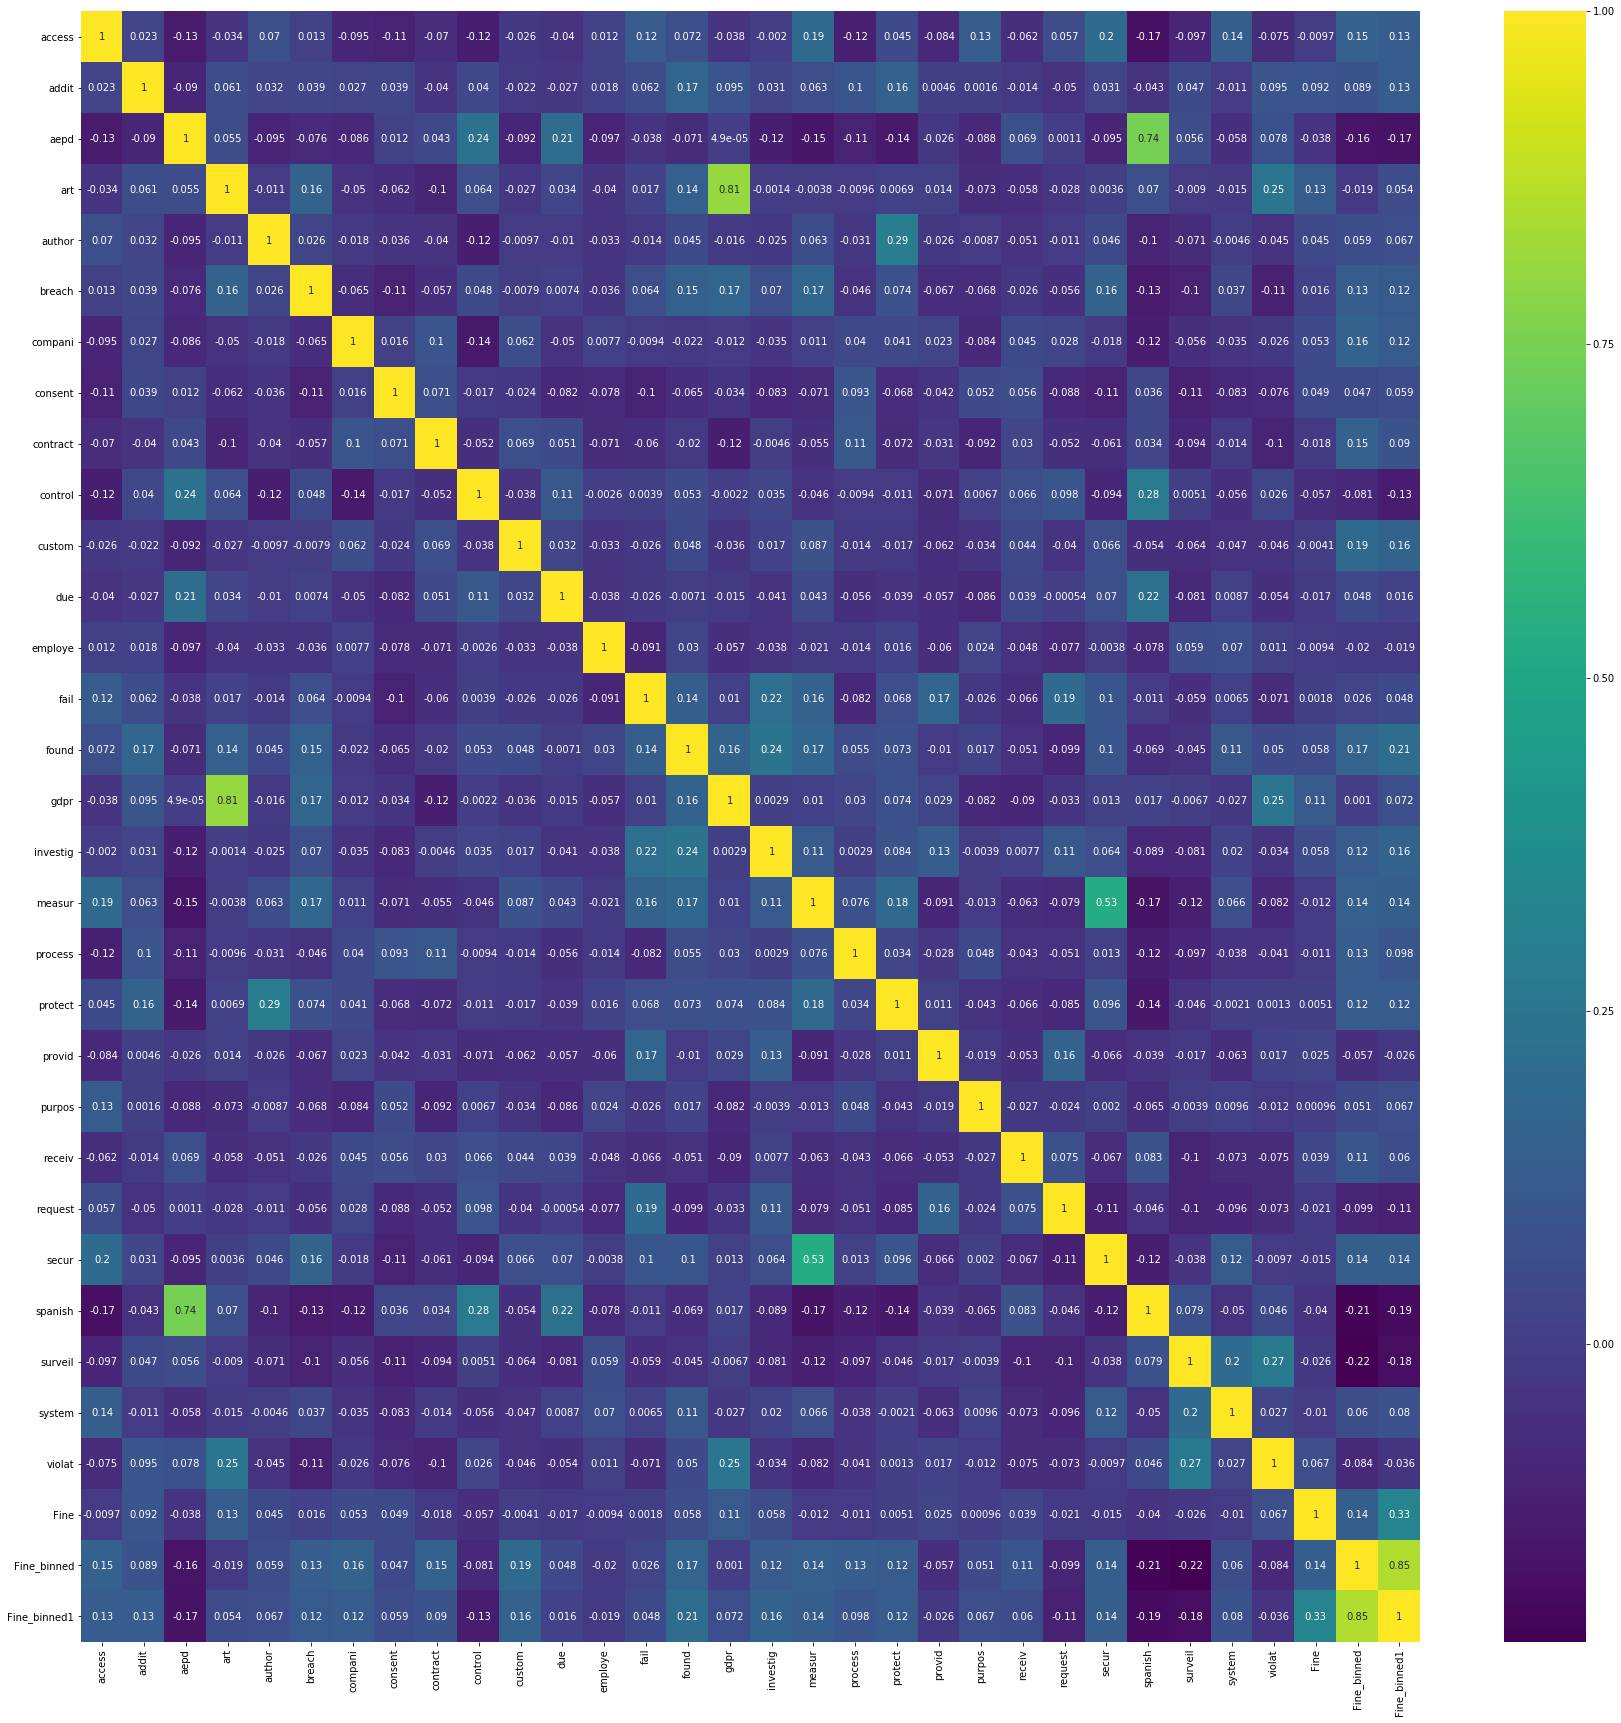

In [13]:
# The heatmap is produced according to the feature correlations
pyplot.figure(figsize=(30,30))
sns.heatmap(df_Tf_Idf_new.corr(),annot=True,cmap='viridis')

# Selection/development of the prediction models
Based on the defined goal, we have to evaluate the combinations of modeling representation techniques by using classical machine learning approaches

In [14]:
# Training and evaluation
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [15]:
# List of models to compare 
seed = 7
models = []
models.append(('LR', LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', LinearSVC()))
models.append(('RANFOR',RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)))

In [16]:
X = df_Tf_Idf_new.iloc[:,0:len(df_Tf_Idf_new.columns)-3]
Y = df_Tf_Idf_new['Fine_binned1']

In [17]:
# Evaluate each model in turn
results = []
names = []
scoring = 'Accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.542154 (0.055581)
KNN: 0.496970 (0.055986)
CART: 0.457985 (0.048227)
NB: 0.525864 (0.045428)
SVM: 0.544840 (0.051505)
RANFOR: 0.518698 (0.052974)


<BarContainer object of 6 artists>

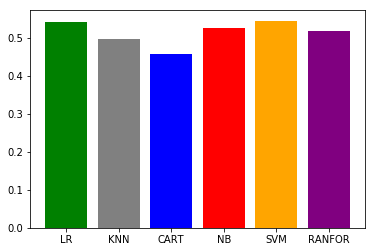

In [18]:
results_mean = [results[i].mean() for i in range(len(results))] 
colors = ['green', 'grey', 'blue', 'red', 'orange', 'purple']
pyplot.bar(names, results_mean,color=colors)

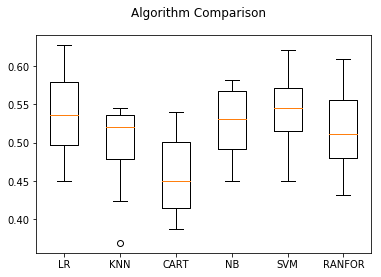

In [19]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Building deep model

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.constraints import unit_norm
from keras.regularizers import l2

model = Sequential()

model.add(Dense(units=32, activation='relu', input_dim=(29), kernel_constraint=unit_norm()))

model.add(Dense(units=24, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(units=11, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 11)                275       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
history = model.fit(X_train, Y_train, epochs=100, batch_size=32,validation_data=(X_test, Y_test))

Train on 740 samples, validate on 365 samples
Epoch 1/100
740/740 [==============================] - 1s 1ms/step - loss: 1.5881 - accuracy: 0.3878 - val_loss: 1.5633 - val_accuracy: 0.4932
Epoch 2/100
740/740 [==============================] - 0s 81us/step - loss: 1.5400 - accuracy: 0.4284 - val_loss: 1.5012 - val_accuracy: 0.4795
Epoch 3/100
740/740 [==============================] - 0s 81us/step - loss: 1.4665 - accuracy: 0.4541 - val_loss: 1.4084 - val_accuracy: 0.4849
Epoch 4/100
740/740 [==============================] - 0s 78us/step - loss: 1.3607 - accuracy: 0.4527 - val_loss: 1.2914 - val_accuracy: 0.4795
Epoch 5/100
740/740 [==============================] - ETA: 0s - loss: 1.4547 - accuracy: 0.28 - 0s 80us/step - loss: 1.2859 - accuracy: 0.4662 - val_loss: 1.2176 - val_accuracy: 0.4959
Epoch 6/100
740/740 [==============================] - 0s 80us/step - loss: 1.1852 - accuracy: 0.5297 - val_loss: 1.1636 - val_accuracy: 0.5260
Epoch 7/100
740/740 [============================

Epoch 57/100
740/740 [==============================] - 0s 75us/step - loss: 0.8145 - accuracy: 0.6527 - val_loss: 1.0680 - val_accuracy: 0.5315
Epoch 58/100
740/740 [==============================] - 0s 71us/step - loss: 0.8203 - accuracy: 0.6527 - val_loss: 1.0711 - val_accuracy: 0.5342
Epoch 59/100
740/740 [==============================] - 0s 71us/step - loss: 0.8138 - accuracy: 0.6473 - val_loss: 1.0727 - val_accuracy: 0.5288
Epoch 60/100
740/740 [==============================] - 0s 71us/step - loss: 0.8056 - accuracy: 0.6716 - val_loss: 1.0926 - val_accuracy: 0.5288
Epoch 61/100
740/740 [==============================] - 0s 82us/step - loss: 0.8258 - accuracy: 0.6459 - val_loss: 1.0831 - val_accuracy: 0.5123
Epoch 62/100
740/740 [==============================] - 0s 90us/step - loss: 0.7936 - accuracy: 0.6703 - val_loss: 1.0785 - val_accuracy: 0.5315
Epoch 63/100
740/740 [==============================] - 0s 94us/step - loss: 0.7913 - accuracy: 0.6703 - val_loss: 1.0841 - val_ac

In [22]:
val_acc_test = []

val_loss_test1, val_acc_test1 = model.evaluate(X_test, Y_test)
val_acc_test.append(val_acc_test1)

print('Test accuracy:', val_acc_test1) 
print('Test loss:', val_loss_test1)

val_loss_train1, val_acc_train1 = model.evaluate(X_train, Y_train)

print('Train accuracy:', val_acc_train1) 
print('Train loss:', val_loss_train1)

365/365 [==============================] - 0s 44us/step
Test accuracy: 0.5287671089172363
Test loss: 1.2599353999307712
740/740 [==============================] - 0s 34us/step
Train accuracy: 0.7662162184715271
Train loss: 0.5784212410449981


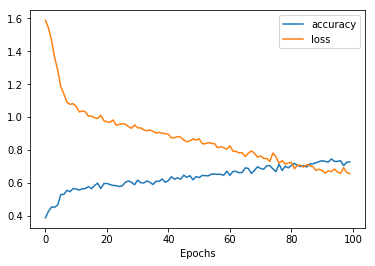

In [23]:
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['loss'])
pyplot.xlabel("Epochs")
pyplot.legend(['accuracy','loss'])
pyplot.show()

Reducing the Network’s Capacity (RNC)

In [24]:
model_RNC = Sequential()

model_RNC.add(Dense(units=25, activation='relu', input_dim=(29), kernel_constraint=unit_norm()))

model_RNC.add(Dense(units=15, activation='relu'))
model_RNC.add(Dropout(.2))

model_RNC.add(Dense(units=5, activation='softmax'))

model_RNC.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_RNC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                750       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                390       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 80        
Total params: 1,220
Trainable params: 1,220
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_RNC=model_RNC.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
740/740 [==============================] - 0s 54us/step - loss: 0.6878 - accuracy: 0.7311
Epoch 2/100
740/740 [==============================] - 0s 49us/step - loss: 0.6943 - accuracy: 0.7230
Epoch 3/100
740/740 [==============================] - 0s 59us/step - loss: 0.6837 - accuracy: 0.7189
Epoch 4/100
740/740 [==============================] - 0s 53us/step - loss: 0.6984 - accuracy: 0.7122
Epoch 5/100
740/740 [==============================] - 0s 57us/step - loss: 0.7082 - accuracy: 0.7122
Epoch 6/100
740/740 [==============================] - 0s 54us/step - loss: 0.6890 - accuracy: 0.7284
Epoch 7/100
740/740 [==============================] - 0s 57us/step - loss: 0.6947 - accuracy: 0.7162
Epoch 8/100
740/740 [==============================] - 0s 54us/step - loss: 0.6871 - accuracy: 0.7162
Epoch 9/100
740/740 [==============================] - 0s 59us/step - loss: 0.7003 - accuracy: 0.7081
Epoch 10/100
740/740 [==============================] - 0s 57us/step - loss: 0.696

In [32]:
val_loss_test2, val_acc_test2 = model_RNC.evaluate(X_test, Y_test)
val_acc_test.append(val_acc_test2)

print('Test accuracy:', val_acc_test2) 
print('Test loss:', val_loss_test2)

val_loss_train2, val_acc_train2 = model_RNC.evaluate(X_train, Y_train)

print('Train accuracy:', val_acc_train2) 
print('Train loss:', val_loss_train2)

365/365 [==============================] - 0s 41us/step
Test accuracy: 0.5479452013969421
Test loss: 1.1942667627987795
740/740 [==============================] - 0s 30us/step
Train accuracy: 0.8013513684272766
Train loss: 0.547501325124019


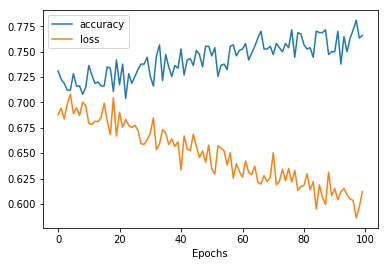

In [33]:
pyplot.plot(history_RNC.history['accuracy'])
pyplot.plot(history_RNC.history['loss'])
pyplot.xlabel("Epochs")
pyplot.legend(['accuracy','loss'])
pyplot.show()

Applying Regularization (AR)

In [34]:
model_AR = Sequential()

model_AR.add(Dense(units=25, activation='relu', input_dim=(29), kernel_constraint=unit_norm(),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

model_AR.add(Dense(units=15, activation='relu'))
model_AR.add(Dropout(.2))

model_AR.add(Dense(units=5, activation='softmax'))

model_AR.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_AR.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 25)                750       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                390       
_________________________________________________________________
dropout_4 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 80        
Total params: 1,220
Trainable params: 1,220
Non-trainable params: 0
_________________________________________________________________


In [35]:
history_AR=model_AR.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
740/740 [==============================] - 1s 724us/step - loss: 1.8243 - accuracy: 0.3392
Epoch 2/100
740/740 [==============================] - 0s 57us/step - loss: 1.7348 - accuracy: 0.4432
Epoch 3/100
740/740 [==============================] - 0s 58us/step - loss: 1.6161 - accuracy: 0.4703
Epoch 4/100
740/740 [==============================] - 0s 55us/step - loss: 1.5195 - accuracy: 0.4649
Epoch 5/100
740/740 [==============================] - 0s 55us/step - loss: 1.4399 - accuracy: 0.4757
Epoch 6/100
740/740 [==============================] - 0s 59us/step - loss: 1.4107 - accuracy: 0.5095
Epoch 7/100
740/740 [==============================] - 0s 57us/step - loss: 1.3900 - accuracy: 0.5108
Epoch 8/100
740/740 [==============================] - 0s 58us/step - loss: 1.3848 - accuracy: 0.4743
Epoch 9/100
740/740 [==============================] - 0s 61us/step - loss: 1.3579 - accuracy: 0.5122
Epoch 10/100
740/740 [==============================] - 0s 57us/step - loss: 1.35

In [36]:
val_loss_test3, val_acc_test3 = model_AR.evaluate(X_test, Y_test)
val_acc_test.append(val_acc_test3)
print('Test accuracy:', val_acc_test3) 
print('Test loss:', val_loss_test3)

val_loss_train3, val_acc_train3 = model_AR.evaluate(X_train, Y_train)

print('Train accuracy:', val_acc_train3) 
print('Train loss:', val_loss_train3)

365/365 [==============================] - 0s 284us/step
Test accuracy: 0.5123287439346313
Test loss: 1.2571685748557522
740/740 [==============================] - 0s 38us/step
Train accuracy: 0.587837815284729
Train loss: 1.131091752889994


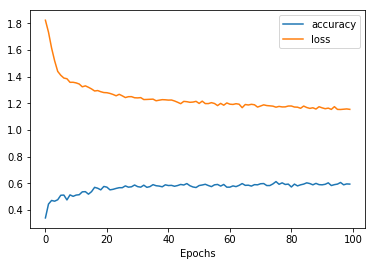

In [37]:
pyplot.plot(history_AR.history['accuracy'])
pyplot.plot(history_AR.history['loss'])
pyplot.xlabel("Epochs")
pyplot.legend(['accuracy','loss'])
pyplot.show()

Adding Dropout Layers (ADL)

In [38]:
model_ADL = Sequential()

model_ADL.add(Dense(units=25, activation='relu', input_dim=(29), kernel_constraint=unit_norm(),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model_ADL.add(Dropout(.5))

model_ADL.add(Dense(units=15, activation='relu'))
model_ADL.add(Dropout(.4))

model_ADL.add(Dense(units=5, activation='softmax'))

model_ADL.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ADL.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 25)                750       
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 15)                390       
_________________________________________________________________
dropout_6 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 80        
Total params: 1,220
Trainable params: 1,220
Non-trainable params: 0
_________________________________________________________________


In [39]:
history_ADL=model_ADL.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
740/740 [==============================] - 1s 695us/step - loss: 1.9078 - accuracy: 0.1270
Epoch 2/100
740/740 [==============================] - 0s 61us/step - loss: 1.8416 - accuracy: 0.2770
Epoch 3/100
740/740 [==============================] - 0s 61us/step - loss: 1.8002 - accuracy: 0.3676
Epoch 4/100
740/740 [==============================] - 0s 62us/step - loss: 1.7456 - accuracy: 0.4257
Epoch 5/100
740/740 [==============================] - 0s 59us/step - loss: 1.7022 - accuracy: 0.4486
Epoch 6/100
740/740 [==============================] - 0s 62us/step - loss: 1.6436 - accuracy: 0.4514
Epoch 7/100
740/740 [==============================] - 0s 66us/step - loss: 1.5734 - accuracy: 0.4824
Epoch 8/100
740/740 [==============================] - 0s 66us/step - loss: 1.5483 - accuracy: 0.4554
Epoch 9/100
740/740 [==============================] - 0s 61us/step - loss: 1.5114 - accuracy: 0.4392
Epoch 10/100
740/740 [==============================] - 0s 86us/step - loss: 1.45

In [40]:
val_loss_test4, val_acc_test4 = model_ADL.evaluate(X_test, Y_test)
val_acc_test.append(val_acc_test4)
print('Test accuracy:', val_acc_test4) 
print('Test loss:', val_loss_test4)

val_loss_train4, val_acc_train4 = model_ADL.evaluate(X_train, Y_train)

print('Train accuracy:', val_acc_train4) 
print('Train loss:', val_loss_train4)

365/365 [==============================] - 0s 325us/step
Test accuracy: 0.5287671089172363
Test loss: 1.2713906800910217
740/740 [==============================] - 0s 38us/step
Train accuracy: 0.5864864587783813
Train loss: 1.2194807629327515


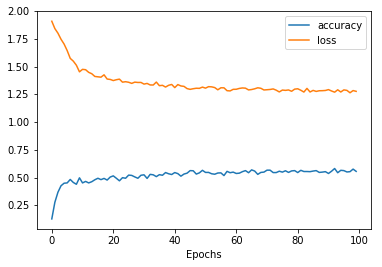

In [41]:
pyplot.plot(history_ADL.history['accuracy'])
pyplot.plot(history_ADL.history['loss'])
pyplot.xlabel("Epochs")
pyplot.legend(['accuracy','loss'])
pyplot.show()

<BarContainer object of 4 artists>

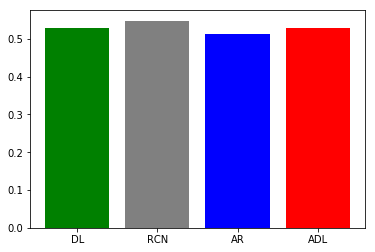

In [43]:
colors1 = ['green', 'grey', 'blue', 'red']
names1 =  ['DL', 'RCN', 'AR', 'ADL']
pyplot.bar(names1, val_acc_test,color=colors1)

*Combining different representation approaches*

In [44]:
# Use Input layers, specify input shape
def model_emb_def (no_of_unique_cat,inp_num_data):

    #Jeremy Howard provides the following rule of thumb; embedding size = min(50, number of categories/2).
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )
    embedding_size = int(embedding_size)

    inp_cat_data = keras.layers.Input(shape=(no_of_unique_cat,))
    # Bind nulti_hot to embedding layer
    emb = keras.layers.Embedding(input_dim=no_of_unique_cat, output_dim=embedding_size)(inp_cat_data)  

    # Also we need flatten embedded output
    # otherwise it's not possible to concatenate it with inp_num_data
    flatten = keras.layers.Flatten()(emb)
    # Concatenate two layers
    conc = keras.layers.Concatenate()([flatten, inp_num_data])
    dense1 = keras.layers.Dense(50, activation=tf.nn.relu, )(conc)

    x= keras.layers.Dense(units=25, activation='relu')(dense1)
    x= keras.layers.Dropout(.2)(x)
    x= keras.layers.Dense(units=15, activation='relu')(x)
    x= keras.layers.Dropout(.2)(x)
    x= keras.layers.Dense(units=10, activation='relu')(x)
    
    # Creating output layer
    #out = keras.layers.Dense(5, activation=tf.keras.activations.softmax)(dense1)
    out = keras.layers.Dense(5, activation=tf.keras.activations.softmax)(x)
    model_def = keras.Model(inputs=[inp_cat_data, inp_num_data], outputs=out)

    return model_def

Combining *tf_idf* and *specific quoted article* feature representations (TF-IDF+SA)

In [45]:
# Use Input layers, specify input shape
no_of_unique_cat= categorical_article_df.shape[1]-1
inp_num_data = keras.layers.Input(shape=(X.shape[1],))

# Creating the model
model_Emb = model_emb_def(no_of_unique_cat,inp_num_data)
model_Emb.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 244)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 244, 50)      12200       input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 12200)        0           embedding[0][0]                  
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 29)]         0                                            
______________________________________________________________________________________________

In [46]:
model_Emb.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [47]:
df_Cat_GDPR_Article_Df= pd.read_csv('Data/Categorical_GDPR_Article_Df.csv')
df_id_names= df_Tf_Idf.iloc[:,-2:]
df_Cat_GDPR_Art_Df_new1=pd.concat([df_Cat_GDPR_Article_Df, df_Tf_Idf], axis=1).reindex(df_Cat_GDPR_Article_Df.index)
df_Cat_GDPR_Art_Df_new1['Fine_binned1'] = pd.cut(df_Cat_GDPR_Art_Df_new1['Fine'], bins=cut_bins, labels=False)
df_Cat_GDPR_Art_Df_new1['Fine_binned1'] = df_Cat_GDPR_Art_Df_new1['Fine_binned1'].astype(np.int64)

In [48]:
# tail of the dataset
df_Cat_GDPR_Art_Df_new1.tail(5) 

,13 GDPR,5 GDPR,14 GDPR,5 (1) a) GDPR,6 GDPR,5 (1) c) GDPR,6 (1) GDPR,5 (1) b) GDPR,15 GDPR,32 GDPR,...,receiv,request,secur,spanish,surveil,system,violat,Fine,Id,Fine_binned1
1100,0,0,0,0,0,0,0,0,0,0,...,0.0,0.252572,0.0,0.233186,0.0,0.0,0.000000,4200,ETid-1143,0
1101,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.297958,0.0,0.0,0.000000,16000,ETid-1144,1
1102,0,0,0,0,0,0,0,0,0,0,...,0.0,0.476385,0.0,0.000000,0.0,0.0,0.424414,4000,ETid-1145,0
1103,0,0,0,0,0,0,0,0,0,0,...,0.0,0.433148,0.0,0.000000,0.0,0.0,0.000000,10000,ETid-1146,1
1104,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.339194,0.0,0.0,0.000000,1500,ETid-1147,0


In [49]:
X1 = df_Cat_GDPR_Art_Df_new1.iloc[:,0:len(df_Cat_GDPR_Art_Df_new1.columns)-3]
Y1 = df_Cat_GDPR_Art_Df_new1['Fine_binned1']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.33, random_state=42)

In [50]:
X1_train_Cat= X1_train.iloc[:,0:len(df_Cat_GDPR_Article_Df.columns)-1]
X1_test_Cat= X1_test.iloc[:,0:len(df_Cat_GDPR_Article_Df.columns)-1]

X1_train_Num= X1_train.iloc[:,-len(df_Tf_Idf.columns)+2:]
X1_test_Num= X1_test.iloc[:,-len(df_Tf_Idf.columns)+2:]

In [51]:
history_Emb = model_Emb.fit([X1_train_Cat, X1_train_Num], Y1_train,epochs=100, batch_size=32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 926us/sample - loss: 1.3205 - accuracy: 0.3892
Epoch 2/100
740/740 [==============================] - 0s 276us/sample - loss: 1.2547 - accuracy: 0.3824
Epoch 3/100
740/740 [==============================] - 0s 272us/sample - loss: 1.1993 - accuracy: 0.4135
Epoch 4/100
740/740 [==============================] - 0s 279us/sample - loss: 1.1859 - accuracy: 0.4365
Epoch 5/100
740/740 [==============================] - 0s 275us/sample - loss: 1.1700 - accuracy: 0.4581
Epoch 6/100
740/740 [==============================] - 0s 299us/sample - loss: 1.1587 - accuracy: 0.4743
Epoch 7/100
740/740 [==============================] - 0s 305us/sample - loss: 1.1421 - accuracy: 0.4824
Epoch 8/100
740/740 [==============================] - 0s 276us/sample - loss: 1.1369 - accuracy: 0.5135
Epoch 9/100
740/740 [==============================] - 0s 276us/sample - loss: 1.0917 - accuracy: 0.4919
Epoch 10/100
740/740 [============

740/740 [==============================] - 0s 271us/sample - loss: 0.4895 - accuracy: 0.8027
Epoch 77/100
740/740 [==============================] - 0s 275us/sample - loss: 0.4813 - accuracy: 0.8054
Epoch 78/100
740/740 [==============================] - 0s 268us/sample - loss: 0.4835 - accuracy: 0.7865
Epoch 79/100
740/740 [==============================] - 0s 275us/sample - loss: 0.4665 - accuracy: 0.8027
Epoch 80/100
740/740 [==============================] - 0s 275us/sample - loss: 0.4720 - accuracy: 0.8000
Epoch 81/100
740/740 [==============================] - 0s 271us/sample - loss: 0.4432 - accuracy: 0.8284
Epoch 82/100
740/740 [==============================] - 0s 268us/sample - loss: 0.4751 - accuracy: 0.8041
Epoch 83/100
740/740 [==============================] - 0s 266us/sample - loss: 0.4444 - accuracy: 0.8297
Epoch 84/100
740/740 [==============================] - 0s 275us/sample - loss: 0.4373 - accuracy: 0.8257
Epoch 85/100
740/740 [==============================] - 0s 

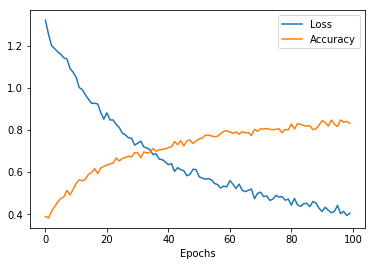

In [52]:
pyplot.plot(history_Emb.history['loss'])
pyplot.plot(history_Emb.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [53]:
val_loss_test5, val_acc_test5 = model_Emb.evaluate([X1_test_Cat, X1_test_Num], Y1_test)
val_acc_test.append(val_acc_test5)

print('Test accuracy:', val_acc_test5) 
print('Test loss:', val_loss_test5)

val_loss_train5, val_acc_train5 = model_Emb.evaluate([X1_train_Cat, X1_train_Num], Y1_train)

print('Train accuracy:', val_acc_train5) 
print('Train loss:', val_loss_train5)

365/365 [==============================] - 0s 445us/sample - loss: 2.0362 - accuracy: 0.5562
Test accuracy: 0.5561644
Test loss: 2.036159560451769
740/740 [==============================] - 0s 115us/sample - loss: 0.3325 - accuracy: 0.8838
Train accuracy: 0.88378376
Train loss: 0.33246072836824364


Combining *tf_idf* and *general quoted article* feature representations (TF-IDF+GA)

In [54]:
# Use Input layers, specify input shape
no_of_unique_gen_cat= categorical_gen_article_df.shape[1]-1
inp_num_data = keras.layers.Input(shape=(X.shape[1],))

# Creating the model
model_Emb2 = model_emb_def(no_of_unique_gen_cat,inp_num_data)
model_Emb2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 62)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 62, 31)       1922        input_4[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 1922)         0           embedding_1[0][0]                
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 29)]         0                                            
____________________________________________________________________________________________

In [55]:
model_Emb2.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [56]:
df_Cat_Gen_GDPR_Article_Df= pd.read_csv('Data/Categorical_Gen_GDPR_Article_Df.csv')
df_id_names= df_Tf_Idf.iloc[:,-2:]
df_Cat_Gen_GDPR_Art_Df_new1=pd.concat([df_Cat_Gen_GDPR_Article_Df, df_Tf_Idf], axis=1).reindex(df_Cat_Gen_GDPR_Article_Df.index)
df_Cat_Gen_GDPR_Art_Df_new1['Fine_binned1'] = pd.cut(df_Cat_Gen_GDPR_Art_Df_new1['Fine'], bins=cut_bins, labels=False)
df_Cat_Gen_GDPR_Art_Df_new1['Fine_binned1'] = df_Cat_Gen_GDPR_Art_Df_new1['Fine_binned1'].astype(np.int64)

In [57]:
# tail of the dataset
df_Cat_Gen_GDPR_Art_Df_new1.tail(5) 

,GDPR13,GDPR5,GDPR14,GDPR6,GDPR15,GDPR32,GDPR28,GDPR33,GDPR34,GDPR12,...,receiv,request,secur,spanish,surveil,system,violat,Fine,Id,Fine_binned1
1100,0,0,0,0,0,0,0,0,0,0,...,0.0,0.252572,0.0,0.233186,0.0,0.0,0.000000,4200,ETid-1143,0
1101,0,1,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.297958,0.0,0.0,0.000000,16000,ETid-1144,1
1102,0,0,0,0,0,0,0,0,0,0,...,0.0,0.476385,0.0,0.000000,0.0,0.0,0.424414,4000,ETid-1145,0
1103,0,0,0,0,0,0,0,0,0,0,...,0.0,0.433148,0.0,0.000000,0.0,0.0,0.000000,10000,ETid-1146,1
1104,0,1,0,1,0,0,0,0,0,0,...,0.0,0.000000,0.0,0.339194,0.0,0.0,0.000000,1500,ETid-1147,0


In [58]:
X2 = df_Cat_Gen_GDPR_Art_Df_new1.iloc[:,0:len(df_Cat_Gen_GDPR_Art_Df_new1.columns)-3]
Y2 = df_Cat_Gen_GDPR_Art_Df_new1['Fine_binned1'] #.iloc[:, -1]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)

In [59]:
X2_train_Cat= X2_train.iloc[:,0:len(df_Cat_Gen_GDPR_Article_Df.columns)-1]
X2_test_Cat= X2_test.iloc[:,0:len(df_Cat_Gen_GDPR_Article_Df.columns)-1]

X2_train_Num= X2_train.iloc[:,-len(df_Tf_Idf.columns)+2:]
X2_test_Num= X2_test.iloc[:,-len(df_Tf_Idf.columns)+2:]

In [60]:
history_Emb2 = model_Emb2.fit([X2_train_Cat, X2_train_Num], Y2_train,epochs=100, batch_size=32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 720us/sample - loss: 1.5961 - accuracy: 0.2378
Epoch 2/100
740/740 [==============================] - 0s 137us/sample - loss: 1.5320 - accuracy: 0.2541
Epoch 3/100
740/740 [==============================] - 0s 137us/sample - loss: 1.3963 - accuracy: 0.3649
Epoch 4/100
740/740 [==============================] - 0s 137us/sample - loss: 1.3174 - accuracy: 0.4095
Epoch 5/100
740/740 [==============================] - 0s 143us/sample - loss: 1.2324 - accuracy: 0.4162
Epoch 6/100
740/740 [==============================] - 0s 142us/sample - loss: 1.1628 - accuracy: 0.4405
Epoch 7/100
740/740 [==============================] - 0s 142us/sample - loss: 1.1498 - accuracy: 0.4351
Epoch 8/100
740/740 [==============================] - 0s 160us/sample - loss: 1.1518 - accuracy: 0.4000
Epoch 9/100
740/740 [==============================] - 0s 160us/sample - loss: 1.1220 - accuracy: 0.4230
Epoch 10/100
740/740 [============

740/740 [==============================] - 0s 144us/sample - loss: 0.6816 - accuracy: 0.7257
Epoch 77/100
740/740 [==============================] - 0s 137us/sample - loss: 0.6830 - accuracy: 0.7149
Epoch 78/100
740/740 [==============================] - 0s 142us/sample - loss: 0.7034 - accuracy: 0.7054
Epoch 79/100
740/740 [==============================] - 0s 140us/sample - loss: 0.6640 - accuracy: 0.7041
Epoch 80/100
740/740 [==============================] - 0s 140us/sample - loss: 0.6543 - accuracy: 0.7446
Epoch 81/100
740/740 [==============================] - 0s 139us/sample - loss: 0.6689 - accuracy: 0.7297
Epoch 82/100
740/740 [==============================] - 0s 137us/sample - loss: 0.6777 - accuracy: 0.7176
Epoch 83/100
740/740 [==============================] - 0s 142us/sample - loss: 0.7051 - accuracy: 0.7149
Epoch 84/100
740/740 [==============================] - 0s 139us/sample - loss: 0.6800 - accuracy: 0.7284
Epoch 85/100
740/740 [==============================] - 0s 

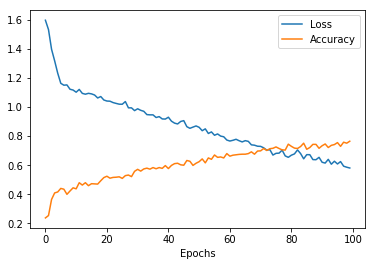

In [61]:
pyplot.plot(history_Emb2.history['loss'])
pyplot.plot(history_Emb2.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [62]:
val_loss_test6, val_acc_test6 = model_Emb2.evaluate([X2_test_Cat, X2_test_Num], Y2_test)
val_acc_test.append(val_acc_test6)

print('Test accuracy:', val_acc_test6) 
print('Test loss:', val_loss_test6)

val_loss_train6, val_acc_train6 = model_Emb2.evaluate([X2_train_Cat, X2_train_Num], Y2_train)

print('Train accuracy:', val_loss_train6) 
print('Train loss:', val_acc_train6)

365/365 [==============================] - 0s 402us/sample - loss: 1.3363 - accuracy: 0.5123
Test accuracy: 0.51232874
Test loss: 1.3363490493330237
740/740 [==============================] - 0s 81us/sample - loss: 0.5046 - accuracy: 0.7973
Train accuracy: 0.5045529223777152
Train loss: 0.7972973


Combining *tf_idf* and *specific quoted article* feature representations with other features in the GDPR dataframe (TF-IDF+SA+OF)

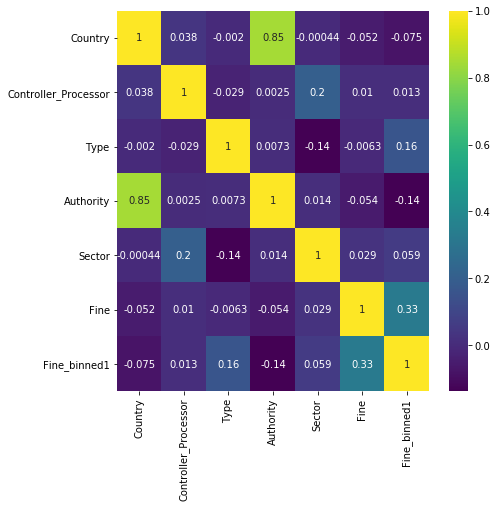

In [63]:
df_new = pd.DataFrame({"Id": df.iloc[:, 0],
                        'Country': df.iloc[:, 1],
                        'Controller_Processor': df.iloc[:, 4],
                        'Type': df.iloc[:, 6],
                        'Authority': df.iloc[:, 8],
                        'Sector': df.iloc[:, 9],
                        'Fine': df.iloc[:, 3],})

df_new.Id = df_new.Id.astype('category')
df_new.Country = df_new.Country.astype('category')
df_new.Controller_Processor = df_new.Controller_Processor.astype('category')
df_new.Type = df_new.Type.astype('category')
df_new.Authority = df_new.Authority.astype('category')
df_new.Sector = df_new.Sector.astype('category')
df_new.Fine = pd.to_numeric(df_new.Fine, downcast='integer')

df_new.Country = df_new.Country.cat.codes
df_new.Controller_Processor = df_new.Controller_Processor.cat.codes
df_new.Type = df_new.Type.cat.codes
df_new.Authority = df_new.Authority.cat.codes
df_new.Sector = df_new.Sector.cat.codes

df_new['Fine_binned1'] = pd.cut(df_new['Fine'], bins=cut_bins, labels=False)
df_new['Fine_binned1'] = df_new['Fine_binned1'].astype(np.int64)

# The correlation heatmap is produced according to the feature correlations
pyplot.figure(figsize=(7,7))
sns.heatmap(df_new.corr(),annot=True,cmap='viridis')

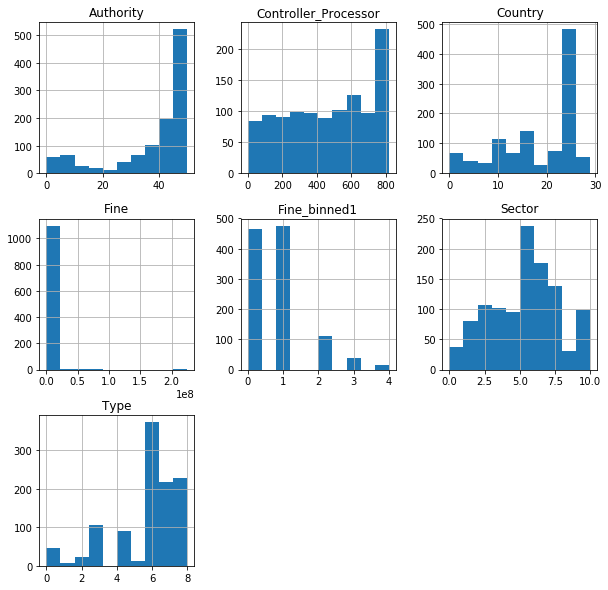

In [64]:
# histograms of the variables
df_new.hist(figsize=(10, 10))
pyplot.show()

In [65]:
from sklearn.preprocessing import StandardScaler
df_new1 = df_new.iloc[:,1:len(df_new.columns)-2]
sc = StandardScaler()
df_new1 = pd.DataFrame(sc.fit_transform(df_new1))
df_new1=pd.concat([df_new1, df_new], axis=1).reindex(df_new.index)

C:\Users\lucp9270\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int16 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lucp9270\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int16 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
df_id_names = df_Tf_Idf.iloc[:,-2:]
df_Cat_GDPR_Art_Df_new2 = pd.concat([df_Cat_GDPR_Art_Df_new1,df_new1.iloc[:,0:5]], axis=1).reindex(df_Cat_GDPR_Art_Df_new1.index)
df_Cat_GDPR_Art_Df_new2['Fine_binned1'] = pd.cut(df_Cat_GDPR_Art_Df_new2['Fine'], bins=cut_bins, labels=False)
df_Cat_GDPR_Art_Df_new2['Fine_binned1'] = df_Cat_GDPR_Art_Df_new2['Fine_binned1'].astype(np.int64)

cols = df_Cat_GDPR_Art_Df_new2.columns.tolist()
cols = cols[:-8] + cols[-5:]+cols[len(cols)-8:len(cols)-5]

df_Cat_GDPR_Art_Df_new2 = df_Cat_GDPR_Art_Df_new2[cols]

In [67]:
# tail of the dataset
df_Cat_GDPR_Art_Df_new2.tail(5)

,13 GDPR,5 GDPR,14 GDPR,5 (1) a) GDPR,6 GDPR,5 (1) c) GDPR,6 (1) GDPR,5 (1) b) GDPR,15 GDPR,32 GDPR,...,violat,0,1,2,3,4,Fine,Id,Id,Fine_binned1
1100,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.877629,-1.360527,-1.369715,0.778230,-0.762759,4200,ETid-1143,ETid-1143,0
1101,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.877629,-0.166206,1.085728,0.778230,-0.762759,16000,ETid-1144,ETid-1144,1
1102,0,0,0,0,0,0,0,0,0,0,...,0.424414,0.634850,0.020027,-2.842980,0.642421,0.049234,4000,ETid-1145,ETid-1145,0
1103,0,0,0,0,0,0,0,0,0,0,...,0.000000,-1.792937,0.015978,-2.842980,-2.209573,-0.762759,10000,ETid-1146,ETid-1146,1
1104,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.877629,-1.388867,0.103551,0.778230,-1.574752,1500,ETid-1147,ETid-1147,0


In [68]:
X3 = df_Cat_GDPR_Art_Df_new2.iloc[:,0:len(df_Cat_GDPR_Art_Df_new2.columns)-4]
Y3 = df_Cat_GDPR_Art_Df_new2['Fine_binned1'] #.iloc[:, -1]
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.33, random_state=42)

X3_train_Cat= X3_train.iloc[:,0:len(df_Cat_GDPR_Article_Df.columns)-1]
X3_test_Cat= X3_test.iloc[:,0:len(df_Cat_GDPR_Article_Df.columns)-1]

X3_train_Num= X3_train.iloc[:,len(df_Cat_GDPR_Article_Df.columns)+1:len(X3.columns)]
X3_test_Num= X3_test.iloc[:,len(df_Cat_GDPR_Article_Df.columns)+1:len(X3.columns)]

In [69]:
# Use Input layers, specify input shape
no_of_unique_cat= categorical_article_df.shape[1]-1
inp_num_data = keras.layers.Input(shape=(X.shape[1]+5,))

# Creating the model
model_Emb3 = model_emb_def(no_of_unique_cat,inp_num_data)
model_Emb3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 244)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 244, 50)      12200       input_6[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 12200)        0           embedding_2[0][0]                
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 34)]         0                                            
____________________________________________________________________________________________

In [70]:
model_Emb3.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_Emb3 = model_Emb3.fit([X3_train_Cat, X3_train_Num], Y3_train,epochs=100, batch_size=32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 856us/sample - loss: 1.3028 - accuracy: 0.4500
Epoch 2/100
740/740 [==============================] - 0s 276us/sample - loss: 1.1788 - accuracy: 0.4514
Epoch 3/100
740/740 [==============================] - 0s 271us/sample - loss: 1.1744 - accuracy: 0.4514
Epoch 4/100
740/740 [==============================] - 0s 268us/sample - loss: 1.1610 - accuracy: 0.4514
Epoch 5/100
740/740 [==============================] - 0s 274us/sample - loss: 1.1504 - accuracy: 0.4676
Epoch 6/100
740/740 [==============================] - 0s 271us/sample - loss: 1.1362 - accuracy: 0.4541
Epoch 7/100
740/740 [==============================] - 0s 278us/sample - loss: 1.1397 - accuracy: 0.4486
Epoch 8/100
740/740 [==============================] - 0s 278us/sample - loss: 1.1081 - accuracy: 0.4581
Epoch 9/100
740/740 [==============================] - 0s 274us/sample - loss: 1.1033 - accuracy: 0.4757
Epoch 10/100
740/740 [============

740/740 [==============================] - 0s 267us/sample - loss: 0.4367 - accuracy: 0.8338
Epoch 77/100
740/740 [==============================] - 0s 270us/sample - loss: 0.3934 - accuracy: 0.8324
Epoch 78/100
740/740 [==============================] - 0s 267us/sample - loss: 0.3723 - accuracy: 0.8473
Epoch 79/100
740/740 [==============================] - 0s 266us/sample - loss: 0.3935 - accuracy: 0.8527
Epoch 80/100
740/740 [==============================] - 0s 274us/sample - loss: 0.3906 - accuracy: 0.8365
Epoch 81/100
740/740 [==============================] - 0s 267us/sample - loss: 0.3713 - accuracy: 0.8500
Epoch 82/100
740/740 [==============================] - 0s 268us/sample - loss: 0.3768 - accuracy: 0.8459
Epoch 83/100
740/740 [==============================] - 0s 268us/sample - loss: 0.3554 - accuracy: 0.8527
Epoch 84/100
740/740 [==============================] - 0s 266us/sample - loss: 0.3546 - accuracy: 0.8568
Epoch 85/100
740/740 [==============================] - 0s 

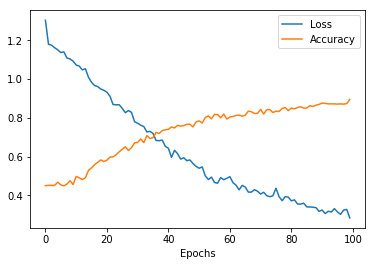

In [71]:
pyplot.plot(history_Emb3.history['loss'])
pyplot.plot(history_Emb3.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [72]:
val_loss_test7, val_acc_test7 = model_Emb3.evaluate([X3_test_Cat, X3_test_Num], Y3_test)
val_acc_test.append(val_acc_test7)

print('Test accuracy:', val_acc_test7) 
print('Test loss:', val_loss_test7)

val_loss_train7, val_acc_train7 = model_Emb3.evaluate([X3_train_Cat, X3_train_Num], Y3_train)

print('Train accuracy:', val_acc_train7) 
print('Train loss:', val_loss_train7)

365/365 [==============================] - 0s 445us/sample - loss: 2.2753 - accuracy: 0.5288
Test accuracy: 0.5287671
Test loss: 2.275326623492045
740/740 [==============================] - 0s 129us/sample - loss: 0.2218 - accuracy: 0.9203
Train accuracy: 0.92027026
Train loss: 0.22177158074604497


Combining *tf_idf* and *general quoted article* feature representations with other features in the GDPR dataframe (TF-IDF+GA+OF)

In [73]:
df_id_names = df_Tf_Idf.iloc[:,-2:]
df_Cat_Gen_GDPR_Art_Df_new2 = pd.concat([df_Cat_Gen_GDPR_Art_Df_new1,df_new1.iloc[:,0:5]], axis=1).reindex(df_Cat_Gen_GDPR_Art_Df_new1.index)
df_Cat_Gen_GDPR_Art_Df_new2['Fine_binned1'] = pd.cut(df_Cat_Gen_GDPR_Art_Df_new2['Fine'], bins=cut_bins, labels=False)
df_Cat_Gen_GDPR_Art_Df_new2['Fine_binned1'] = df_Cat_Gen_GDPR_Art_Df_new2['Fine_binned1'].astype(np.int64)

cols = df_Cat_Gen_GDPR_Art_Df_new2.columns.tolist()
cols = cols[:-8] + cols[-5:]+cols[len(cols)-8:len(cols)-5]

df_Cat_Gen_GDPR_Art_Df_new2 = df_Cat_Gen_GDPR_Art_Df_new2[cols]

In [74]:
# tail of the dataset
df_Cat_Gen_GDPR_Art_Df_new2.tail(5)

,GDPR13,GDPR5,GDPR14,GDPR6,GDPR15,GDPR32,GDPR28,GDPR33,GDPR34,GDPR12,...,violat,0,1,2,3,4,Fine,Id,Id,Fine_binned1
1100,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.877629,-1.360527,-1.369715,0.778230,-0.762759,4200,ETid-1143,ETid-1143,0
1101,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.877629,-0.166206,1.085728,0.778230,-0.762759,16000,ETid-1144,ETid-1144,1
1102,0,0,0,0,0,0,0,0,0,0,...,0.424414,0.634850,0.020027,-2.842980,0.642421,0.049234,4000,ETid-1145,ETid-1145,0
1103,0,0,0,0,0,0,0,0,0,0,...,0.000000,-1.792937,0.015978,-2.842980,-2.209573,-0.762759,10000,ETid-1146,ETid-1146,1
1104,0,1,0,1,0,0,0,0,0,0,...,0.000000,0.877629,-1.388867,0.103551,0.778230,-1.574752,1500,ETid-1147,ETid-1147,0


In [75]:
X4 = df_Cat_Gen_GDPR_Art_Df_new2.iloc[:,0:len(df_Cat_Gen_GDPR_Art_Df_new2.columns)-4]
Y4 = df_Cat_Gen_GDPR_Art_Df_new2['Fine_binned1'] #.iloc[:, -1]
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.33, random_state=42)

X4_train_Cat= X4_train.iloc[:,0:len(df_Cat_Gen_GDPR_Article_Df.columns)-1]
X4_test_Cat= X4_test.iloc[:,0:len(df_Cat_Gen_GDPR_Article_Df.columns)-1]

X4_train_Num= X4_train.iloc[:,len(df_Cat_Gen_GDPR_Article_Df.columns)+1:len(X4.columns)]
X4_test_Num= X4_test.iloc[:,len(df_Cat_Gen_GDPR_Article_Df.columns)+1:len(X4.columns)]

In [76]:
# Use Input layers, specify input shape
no_of_unique_cat_gen= categorical_gen_article_df.shape[1]-1
inp_num_data = keras.layers.Input(shape=(X.shape[1]+5,))

# Creating the model
model_Emb4 = model_emb_def(no_of_unique_cat_gen,inp_num_data)
model_Emb4.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 62)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 62, 31)       1922        input_8[0][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 1922)         0           embedding_3[0][0]                
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 34)]         0                                            
____________________________________________________________________________________________

In [77]:
model_Emb4.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_Emb4 = model_Emb4.fit([X4_train_Cat, X4_train_Num], Y4_train,epochs=100, batch_size=32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 732us/sample - loss: 1.5939 - accuracy: 0.3568
Epoch 2/100
740/740 [==============================] - 0s 135us/sample - loss: 1.5103 - accuracy: 0.4324
Epoch 3/100
740/740 [==============================] - 0s 142us/sample - loss: 1.4050 - accuracy: 0.4459
Epoch 4/100
740/740 [==============================] - 0s 137us/sample - loss: 1.2883 - accuracy: 0.4568
Epoch 5/100
740/740 [==============================] - 0s 140us/sample - loss: 1.2174 - accuracy: 0.4459
Epoch 6/100
740/740 [==============================] - 0s 168us/sample - loss: 1.1658 - accuracy: 0.4622
Epoch 7/100
740/740 [==============================] - 0s 151us/sample - loss: 1.1362 - accuracy: 0.4486
Epoch 8/100
740/740 [==============================] - 0s 139us/sample - loss: 1.1210 - accuracy: 0.4500
Epoch 9/100
740/740 [==============================] - 0s 146us/sample - loss: 1.0993 - accuracy: 0.4446
Epoch 10/100
740/740 [============

740/740 [==============================] - 0s 139us/sample - loss: 0.3860 - accuracy: 0.8514
Epoch 77/100
740/740 [==============================] - 0s 137us/sample - loss: 0.3978 - accuracy: 0.8419
Epoch 78/100
740/740 [==============================] - 0s 137us/sample - loss: 0.3740 - accuracy: 0.8581
Epoch 79/100
740/740 [==============================] - 0s 142us/sample - loss: 0.3832 - accuracy: 0.8608
Epoch 80/100
740/740 [==============================] - 0s 136us/sample - loss: 0.3660 - accuracy: 0.8500
Epoch 81/100
740/740 [==============================] - 0s 139us/sample - loss: 0.3523 - accuracy: 0.8811
Epoch 82/100
740/740 [==============================] - 0s 135us/sample - loss: 0.3665 - accuracy: 0.8757
Epoch 83/100
740/740 [==============================] - 0s 136us/sample - loss: 0.3114 - accuracy: 0.8946
Epoch 84/100
740/740 [==============================] - 0s 137us/sample - loss: 0.3246 - accuracy: 0.8811
Epoch 85/100
740/740 [==============================] - 0s 

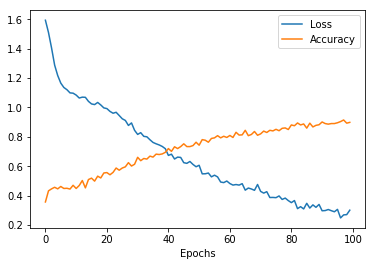

In [78]:
pyplot.plot(history_Emb4.history['loss'])
pyplot.plot(history_Emb4.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [79]:
val_loss_test8, val_acc_test8 = model_Emb4.evaluate([X4_test_Cat, X4_test_Num], Y4_test)
val_acc_test.append(val_acc_test8)

print('Test accuracy:', val_acc_test8) 
print('Test loss:', val_loss_test8)

val_loss_train8, val_acc_train8 = model_Emb4.evaluate([X4_train_Cat, X4_train_Num], Y4_train)

print('Train accuracy:', val_acc_train8) 
print('Train loss:', val_loss_train8)

365/365 [==============================] - 0s 399us/sample - loss: 2.1335 - accuracy: 0.5452
Test accuracy: 0.5452055
Test loss: 2.133533140077983
740/740 [==============================] - 0s 81us/sample - loss: 0.2122 - accuracy: 0.9284
Train accuracy: 0.9283784
Train loss: 0.21222980152312163


Analysis based on other features in the GDPR dataframe (OF)

In [80]:
X_OF = df_new1.iloc[:,0:5]
Y_OF = df_new1['Fine_binned1']

X_train_OF, X_test_OF, Y_train_OF, Y_test_OF = train_test_split(X_OF, Y_OF, test_size=0.33, random_state=42)

In [81]:
model_OF = Sequential()
model_OF.add(Dense(units=50, activation='relu', input_dim=(5), kernel_constraint=unit_norm()))
model_OF.add(Dropout(.2))
model_OF.add(Dense(units=15, activation='relu'))
model_OF.add(Dropout(.2))
model_OF.add(Dense(units=10, activation='relu'))
model_OF.add(Dense(units=5, activation='softmax'))
model_OF.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_OF.summary()

history_OF=model_OF.fit(X_train_OF, Y_train_OF, epochs=100, batch_size=32)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                300       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                765       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
Total params: 1,280
Trainable params: 1,280
Non-trainable params: 0
____________________________________________________

740/740 [==============================] - 0s 128us/step - loss: 1.0099 - accuracy: 0.5405
Epoch 70/100
740/740 [==============================] - 0s 126us/step - loss: 1.0062 - accuracy: 0.5527
Epoch 71/100
740/740 [==============================] - 0s 108us/step - loss: 1.0121 - accuracy: 0.5392
Epoch 72/100
740/740 [==============================] - 0s 111us/step - loss: 1.0088 - accuracy: 0.5595
Epoch 73/100
740/740 [==============================] - 0s 96us/step - loss: 1.0024 - accuracy: 0.5689
Epoch 74/100
740/740 [==============================] - 0s 101us/step - loss: 1.0095 - accuracy: 0.5595
Epoch 75/100
740/740 [==============================] - 0s 105us/step - loss: 1.0192 - accuracy: 0.5432
Epoch 76/100
740/740 [==============================] - 0s 131us/step - loss: 1.0223 - accuracy: 0.5324
Epoch 77/100
740/740 [==============================] - 0s 110us/step - loss: 0.9949 - accuracy: 0.5649
Epoch 78/100
740/740 [==============================] - 0s 110us/step - loss: 

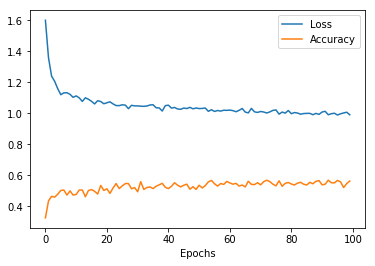

In [82]:
pyplot.plot(history_OF.history['loss'])
pyplot.plot(history_OF.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [83]:
val_loss_test9, val_acc_test9 = model_OF.evaluate(X_test_OF, Y_test_OF)
val_acc_test.append(val_acc_test9)

print('Test accuracy:', val_acc_test9) 
print('Test loss:', val_loss_test9)

val_loss_train9, val_acc_train9 = model_OF.evaluate(X_train_OF, Y_train_OF)

print('Train accuracy:', val_acc_train9) 
print('Train loss:', val_loss_train9)

365/365 [==============================] - 0s 713us/step
Test accuracy: 0.567123293876648
Test loss: 1.0343643900466293
740/740 [==============================] - 0s 50us/step
Train accuracy: 0.5648648738861084
Train loss: 0.9538864883216651


Combining specific quoted article feature representations with other features in the GDPR dataframe (SA+OF)

In [84]:
df_OF = df_new1.iloc[:,[0,1,2,3,4,len(df_new1.columns)-1]]
df_OF_SA_Df = pd.concat([df_Cat_GDPR_Article_Df, df_OF], axis=1).reindex(df_Cat_GDPR_Article_Df.index)
df_OF_SA_Df = df_OF_SA_Df.drop(['Id'], axis = 1)

In [85]:
X5 = df_OF_SA_Df.iloc[:,0:len(df_OF_SA_Df.columns)-1]
Y5 = df_OF_SA_Df['Fine_binned1'] 
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.33, random_state=42)

X5_train_Cat= X5_train.iloc[:,0:len(df_Cat_GDPR_Article_Df.columns)-1]
X5_test_Cat= X5_test.iloc[:,0:len(df_Cat_GDPR_Article_Df.columns)-1]

X5_train_Num= X5_train.iloc[:,len(df_Cat_GDPR_Article_Df.columns)-1:len(X5.columns)]
X5_test_Num= X5_test.iloc[:,len(df_Cat_GDPR_Article_Df.columns)-1:len(X5.columns)]

In [86]:
# Use Input layers, specify input shape
no_of_unique_cat= len(df_Cat_GDPR_Article_Df.columns)-1
inp_num_data = keras.layers.Input(shape=(5,))

# Creating the model
model_Emb5 = model_emb_def(no_of_unique_cat,inp_num_data)
model_Emb5.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 244)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 244, 50)      12200       input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 12200)        0           embedding[0][0]                  
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________

In [87]:
model_Emb5.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_Emb5 = model_Emb5.fit([X5_train_Cat, X5_train_Num], Y5_train,epochs=100, batch_size=32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 2ms/sample - loss: 1.4134 - accuracy: 0.4270
Epoch 2/100
740/740 [==============================] - 0s 418us/sample - loss: 1.2828 - accuracy: 0.4081
Epoch 3/100
740/740 [==============================] - 0s 409us/sample - loss: 1.2225 - accuracy: 0.4432
Epoch 4/100
740/740 [==============================] - 0s 408us/sample - loss: 1.1833 - accuracy: 0.4365
Epoch 5/100
740/740 [==============================] - 0s 411us/sample - loss: 1.2130 - accuracy: 0.4162
Epoch 6/100
740/740 [==============================] - 0s 427us/sample - loss: 1.1458 - accuracy: 0.4459
Epoch 7/100
740/740 [==============================] - 0s 420us/sample - loss: 1.1280 - accuracy: 0.4608
Epoch 8/100
740/740 [==============================] - 0s 427us/sample - loss: 1.0794 - accuracy: 0.5162
Epoch 9/100
740/740 [==============================] - 0s 428us/sample - loss: 1.0709 - accuracy: 0.5297
Epoch 10/100
740/740 [==============

740/740 [==============================] - 0s 381us/sample - loss: 0.5063 - accuracy: 0.7878
Epoch 76/100
740/740 [==============================] - 0s 425us/sample - loss: 0.5105 - accuracy: 0.7770
Epoch 77/100
740/740 [==============================] - 0s 427us/sample - loss: 0.5065 - accuracy: 0.7797
Epoch 78/100
740/740 [==============================] - 0s 416us/sample - loss: 0.5239 - accuracy: 0.7865
Epoch 79/100
740/740 [==============================] - 0s 393us/sample - loss: 0.5096 - accuracy: 0.7919
Epoch 80/100
740/740 [==============================] - 0s 415us/sample - loss: 0.5012 - accuracy: 0.7824
Epoch 81/100
740/740 [==============================] - 0s 384us/sample - loss: 0.4976 - accuracy: 0.7878
Epoch 82/100
740/740 [==============================] - 0s 424us/sample - loss: 0.4848 - accuracy: 0.7919
Epoch 83/100
740/740 [==============================] - 0s 414us/sample - loss: 0.4963 - accuracy: 0.7770
Epoch 84/100
740/740 [==============================] - 0s 

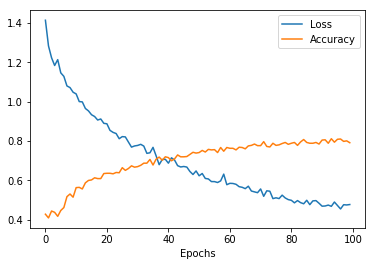

In [88]:
pyplot.plot(history_Emb5.history['loss'])
pyplot.plot(history_Emb5.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [89]:
val_loss_test10, val_acc_test10 = model_Emb5.evaluate([X5_test_Cat, X5_test_Num], Y5_test)
val_acc_test.append(val_acc_test10)

print('Test accuracy:', val_acc_test10) 
print('Test loss:', val_loss_test10)

val_loss_train10, val_acc_train10 = model_Emb5.evaluate([X5_train_Cat, X5_train_Num], Y5_train)

print('Train accuracy:', val_acc_train10) 
print('Train loss:', val_loss_train10)

365/365 [==============================] - 0s 1ms/sample - loss: 1.9901 - accuracy: 0.5425
Test accuracy: 0.54246575
Test loss: 1.99007576181464
740/740 [==============================] - 0s 193us/sample - loss: 0.3712 - accuracy: 0.8486
Train accuracy: 0.84864867
Train loss: 0.3712417922309927


Combining general quoted article feature representations with other features in the GDPR dataframe (GA+OF)

In [90]:
df_OF_GA_Df = pd.concat([df_Cat_Gen_GDPR_Article_Df, df_OF], axis=1).reindex(df_Cat_GDPR_Article_Df.index)
df_OF_GA_Df = df_OF_GA_Df.drop(['Id'], axis = 1)

In [91]:
X6 = df_OF_GA_Df.iloc[:,0:len(df_OF_GA_Df.columns)-1]
Y6 = df_OF_GA_Df['Fine_binned1'] 
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size=0.33, random_state=42)

X6_train_Cat= X6_train.iloc[:,0:len(df_Cat_Gen_GDPR_Article_Df.columns)-1]
X6_test_Cat= X6_test.iloc[:,0:len(df_Cat_Gen_GDPR_Article_Df.columns)-1]

X6_train_Num= X6_train.iloc[:,len(df_Cat_Gen_GDPR_Article_Df.columns)-1:len(X6.columns)]
X6_test_Num= X6_test.iloc[:,len(df_Cat_Gen_GDPR_Article_Df.columns)-1:len(X6.columns)]

In [92]:
# Use Input layers, specify input shape
no_of_unique_cat_gen= len(df_Cat_Gen_GDPR_Article_Df.columns)-1
inp_num_data = keras.layers.Input(shape=(5,))

# Creating the model
model_Emb6 = model_emb_def(no_of_unique_cat_gen,inp_num_data)
model_Emb6.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 62)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 62, 31)       1922        input_4[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 1922)         0           embedding_1[0][0]                
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
____________________________________________________________________________________________

In [93]:
model_Emb6.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_Emb6 = model_Emb6.fit([X6_train_Cat, X6_train_Num], Y6_train,epochs=100, batch_size=32)

Train on 740 samples
Epoch 1/100
740/740 [==============================] - 1s 1ms/sample - loss: 1.3582 - accuracy: 0.3568
Epoch 2/100
740/740 [==============================] - 0s 229us/sample - loss: 1.1670 - accuracy: 0.4608
Epoch 3/100
740/740 [==============================] - 0s 225us/sample - loss: 1.1583 - accuracy: 0.4635
Epoch 4/100
740/740 [==============================] - 0s 234us/sample - loss: 1.1577 - accuracy: 0.4284
Epoch 5/100
740/740 [==============================] - 0s 248us/sample - loss: 1.1396 - accuracy: 0.4122
Epoch 6/100
740/740 [==============================] - 0s 221us/sample - loss: 1.1374 - accuracy: 0.4514
Epoch 7/100
740/740 [==============================] - 0s 219us/sample - loss: 1.1138 - accuracy: 0.4608
Epoch 8/100
740/740 [==============================] - 0s 224us/sample - loss: 1.1036 - accuracy: 0.4554
Epoch 9/100
740/740 [==============================] - 0s 235us/sample - loss: 1.1098 - accuracy: 0.4473
Epoch 10/100
740/740 [==============

740/740 [==============================] - 0s 183us/sample - loss: 0.6352 - accuracy: 0.7149
Epoch 76/100
740/740 [==============================] - 0s 209us/sample - loss: 0.6489 - accuracy: 0.6973
Epoch 77/100
740/740 [==============================] - 0s 209us/sample - loss: 0.6225 - accuracy: 0.7230
Epoch 78/100
740/740 [==============================] - 0s 220us/sample - loss: 0.6006 - accuracy: 0.7324
Epoch 79/100
740/740 [==============================] - 0s 209us/sample - loss: 0.5819 - accuracy: 0.7432
Epoch 80/100
740/740 [==============================] - 0s 220us/sample - loss: 0.6180 - accuracy: 0.7054
Epoch 81/100
740/740 [==============================] - 0s 224us/sample - loss: 0.6040 - accuracy: 0.7243
Epoch 82/100
740/740 [==============================] - 0s 209us/sample - loss: 0.5909 - accuracy: 0.7216
Epoch 83/100
740/740 [==============================] - 0s 230us/sample - loss: 0.5867 - accuracy: 0.7351
Epoch 84/100
740/740 [==============================] - 0s 

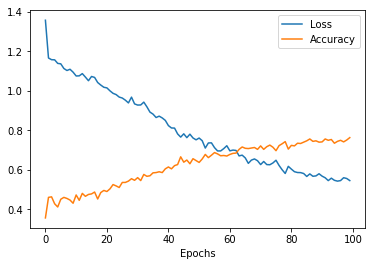

In [94]:
pyplot.plot(history_Emb6.history['loss'])
pyplot.plot(history_Emb6.history['accuracy'])
pyplot.xlabel("Epochs")
pyplot.legend(['Loss', 'Accuracy'])
pyplot.show()

In [95]:
val_loss_test11, val_acc_test11 = model_Emb6.evaluate([X6_test_Cat, X6_test_Num], Y6_test)
val_acc_test.append(val_acc_test11)

print('Test accuracy:', val_acc_test11) 
print('Test loss:', val_loss_test11)

val_loss_train11, val_acc_train11 = model_Emb6.evaluate([X6_train_Cat, X6_train_Num], Y6_train)

print('Train accuracy:', val_acc_train11) 
print('Train loss:', val_loss_train11)

365/365 [==============================] - 0s 945us/sample - loss: 1.6107 - accuracy: 0.5425
Test accuracy: 0.54246575
Test loss: 1.6106953426583173
740/740 [==============================] - 0s 115us/sample - loss: 0.4592 - accuracy: 0.8027
Train accuracy: 0.8027027
Train loss: 0.4591899951164787


<BarContainer object of 11 artists>

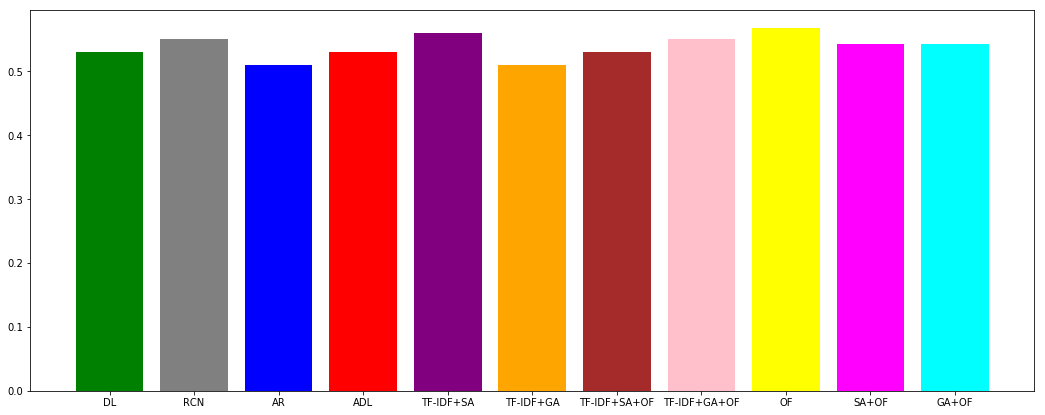

In [98]:
colors2 = ['green', 'grey', 'blue', 'red','purple','orange','brown','pink','yellow','magenta','cyan']
names2 =  ['DL', 'RCN', 'AR', 'ADL','TF-IDF+SA','TF-IDF+GA','TF-IDF+SA+OF','TF-IDF+GA+OF','OF', 'SA+OF','GA+OF']
pyplot.figure(figsize=(18, 7))
pyplot.bar(names2, val_acc_test,color=colors2)

# Conclusions
- We have looked at some approaches for predicting the risk of a company getting fined.

- The experimental results show that the deep learning model that combines TF-IDF and specific quoted article feature representations obtains the best performance.

- However, deeper feature extraction like a tree representation of the quoted article feature could help improve the model performance.